In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import wandb

In [3]:
api = wandb.Api()

In [4]:
run_ids = {
    "PPO": "zmmom7ip",
    "RLOO": "q5sf1skg",
    "GRPO (No Std)": "8kxp2spw",
    "GRPO": "r54fq5bn",
}
runs = {k: api.run(f"mbereket/perturb_reasoning/{v}") for k, v in run_ids.items()}

In [5]:
df = None
for k, run in runs.items():
    val_df = run.history(keys=["_step", "val-core/k562_cnmf/reward/mean@1"])
    val_df = val_df.rename(columns={"val-core/k562_cnmf/reward/mean@1": k})
    if df is None:
        df = val_df
    else:
        df = df.merge(val_df, on="_step")

Text(0, 0.5, 'Reward')

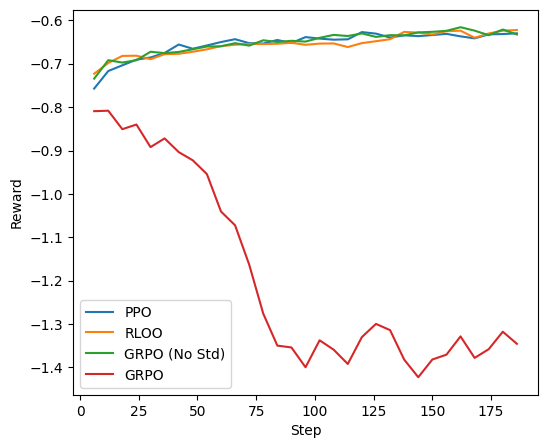

In [6]:
plt.figure(figsize=(6,5))
for k in runs.keys():
    plt.plot(df["_step"], df[k], label=k)
plt.legend()
plt.xlabel("Step")
plt.ylabel("Reward")

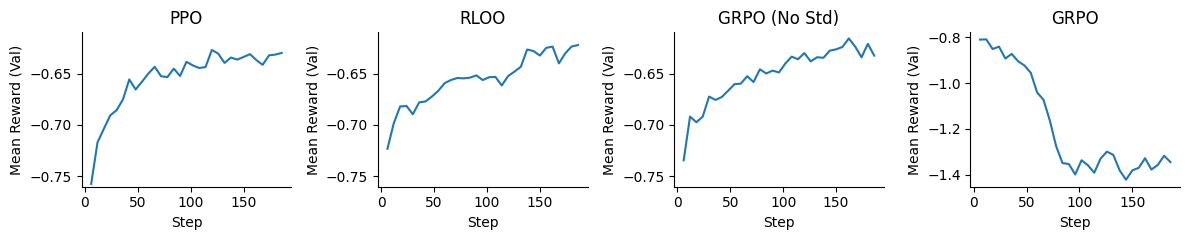

In [7]:
fig, axes = plt.subplots(ncols=len(runs), figsize=(3*len(runs), 2.5))
for k, ax in zip(runs.keys(), axes.flat):
    ax.plot(df["_step"], df[k])
    if k != "GRPO":
        ax.set_ylim(-0.76, -0.61)
    ax.set_xlabel("Step")
    ax.set_ylabel("Mean Reward (Val)")
    ax.spines[["right", "top"]].set_visible(False)
    ax.set_title(k)
plt.tight_layout()
plt.savefig("step_val_rewards.png", dpi=200, transparent=True)